# $$\int \limits_{0}^{1}x^{n}e^{x - 1}dx $$

In [1]:
import math
import scipy.integrate as inte
import numpy as np
from decimal import *

In [2]:
def Jn_integrate():
  return Decimal(inte.quad(lambda x: x**15 * math.exp(x - 1), 0, 1)[0])

In [3]:
toch = 18

In [4]:
def Jn_recur(Jn, n, check):
  getcontext().prec = toch
  if n != check:
    return Jn_recur(1 - (n + 1) * Jn, n + 1, check)
  else:
    return 1 - (n + 1) * Jn

In [5]:
Jn_integrate()

Decimal('0.059017540879297801514891119722960866056382656097412109375')

In [6]:
J1 = Decimal(1 / math.exp(1))

In [7]:
getcontext().prec = toch
Jn_recur(J1, 1, 15)

Decimal('0.055459809681408000')

In [8]:
abs(Jn_recur(J1, 1, 15) - Jn_integrate())

Decimal('0.00355773119788980151')

In [9]:
n = 1
getcontext().prec = n
while abs(Jn_recur(J1, 1, 15) - Jn_integrate()) >= Decimal(10**-2):
  getcontext().prec = n
  n += 1
n

1

In [10]:
getcontext().prec = n
abs(Jn_recur(J1, 1, 15) - Jn_integrate())

Decimal('0.00355773119788980151')

# $$\sin(x) = \sum_{n=0}^{\infty}a_{n}, a_{n}=(-1)^{n}\frac{x^{2n+1}}{(2n+1)!}$$

In [11]:
import math
import matplotlib.pyplot as plt
from decimal import *

In [12]:
math.sin(50.0)

-0.26237485370392877

In [22]:
def a_n(x, n):
    getcontext().prec = 10
    return (-1)**n * (x**(2*n + 1) / math.factorial(2*n + 1))

In [23]:
def mySIN(x, eps):
    getcontext().prec = 10
    n = 0
    mysin = 0
    while abs(a_n(x, n)) > eps:
        mysin += a_n(x, n)
        n += 1
    return mysin, n

In [15]:
x = Decimal(50)
eps = Decimal(10**-6)

In [16]:
mySIN(x, eps)

(Decimal('-4.284258426E+10'), 73)

In [17]:
_, n = mySIN(x, eps)

## График $y = \ln(|S_n|)$ при мантисе равной 10

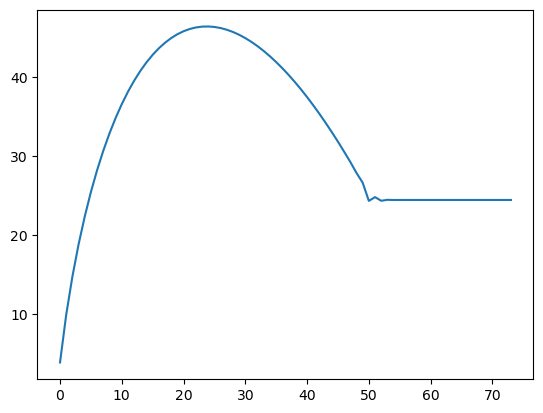

In [18]:
S = [a_n(x, 0)]
for k in range(1, n + 1):
  S.append(S[-1] + a_n(x, k))

plt.plot([k for k in range(n + 1)], [math.log(abs(y)) for y in S])

## График $y = \log_{10}(|S_n|)$ при мантисе равной 28

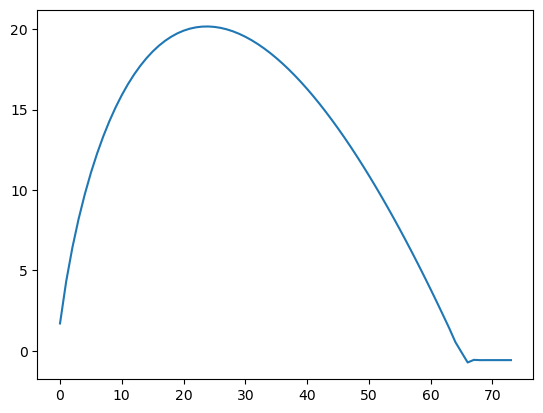

In [21]:
S = [a_n(x, 0)]
for k in range(1, n + 1):
  S.append(S[-1] + a_n(x, k))

plt.plot([k for k in range(n + 1)], [math.log10(abs(y)) for y in S])

## График $y = \log_{10}(|S_n|)$ при мантисе равной 10

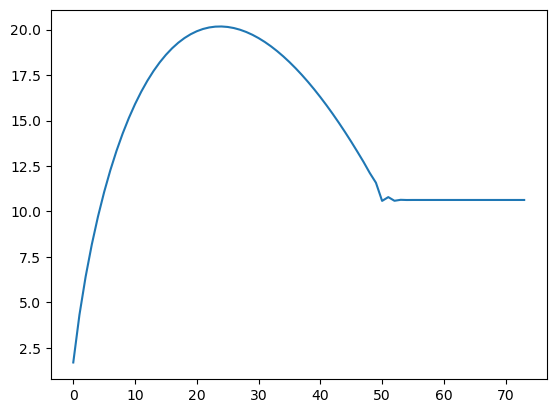

In [24]:
S = [a_n(x, 0)]
for k in range(1, n + 1):
  S.append(S[-1] + a_n(x, k))

plt.plot([k for k in range(n + 1)], [math.log10(abs(y)) for y in S])